# Import

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers, initializers
from tensorflow import set_random_seed
from sklearn.svm import SVR

pd.set_option('display.max_columns', 500)

Using TensorFlow backend.


# General Data loading

In [2]:
path_abs = os.path.abspath('.')
path = path_abs + '/data/'

In [3]:
df_data = pd.read_csv(path+'final_cleaned_dataset.csv')
print("Shape df_data: "+str(df_data.shape))

Shape df_data: (75666, 42)


In [4]:
df_data.head()

,scoutId,zipCode,Schluessel,bln,krs,purchasePrice,buildingType,cellar,condition,energyEfficiencyClass,firingTypes,heatingType,interiorQual,lastRefurbish,livingSpace,lotArea,noParkSpaces,noRooms,numberOfFloors,picturecount,pricetrend,pricetrendbuy,pricetrendrent,rented,telekomInternet,thermalChar,usableArea,yearConstructed,yearConstructedRange,qkm,einwohner,bev_pro_km2,wanderungssaldo16,bevoelkerungsdichte2016,beschaeftigtenquote2016,bevoelkerungsentwicklung2016,bruttoentgelteJeBeschaeftigte2016,geburtenGestorbenenueberschuss2016,verfuegbaresEinkommenJeEinwohner2016,ms_key,ms_65qm,ms_100qm
0,111439855,51371,5316,Nordrhein_Westfalen,Leverkusen,295000.0,2,0,0,0,1,1,2,NaN,258.0,230.0,NaN,7.0,2.0,53,6.77,6.77,0.19,0,100.0,NaN,NaN,NaN,NaN,15.109325,29561.0,1956.473899,-6.6,2038.4,56.8,-22.9,68.6,-13.5,20884,Köln,8.55,9.7
1,111439792,48488,3454,Niedersachsen,Emsland_Kreis,291000.0,1,0,1,6,1,1,0,1980.0,136.0,1594.0,3.0,4.0,NaN,19,9.68,9.68,2.04,0,50.0,154.0,NaN,1980.0,3.0,140.069215,9780.0,69.822623,59.9,108.6,57.5,59.4,41.1,3.2,20469,NaN,NaN,NaN
2,111439750,52477,5334,Nordrhein_Westfalen,Aachen_Kreis,410000.0,3,1,1,4,1,1,0,1993.0,155.0,464.0,3.0,5.0,NaN,10,6.76,6.76,2.27,0,50.0,98.0,55.0,1993.0,5.0,31.654418,46553.0,1470.663590,-3.1,800.1,51.1,-26.2,49.8,-14.9,19781,Alsdorf,6.00,5.4
3,111439851,31241,3157,Niedersachsen,Peine_Kreis,299000.0,1,1,5,6,1,1,0,1965.0,130.0,1010.0,1.0,7.0,2.0,37,6.94,6.94,1.19,0,100.0,159.5,50.0,1965.0,2.0,28.994730,11523.0,397.417048,77.6,245.8,59.2,49.7,41.3,-27.2,21203,Ilsede,NaN,NaN
4,111439746,52457,5358,Nordrhein_Westfalen,Düren_Kreis,320000.0,1,1,1,4,1,1,0,2011.0,102.0,649.0,3.0,4.0,NaN,8,7.67,7.67,1.19,0,50.0,98.0,55.0,NaN,NaN,44.093991,13751.0,311.856552,1.0,284.4,54.4,-28.8,45.8,-22.8,20526,"Aldenhofen, Gemeinde",NaN,NaN


In [5]:
used = ['zipCode', 'bln', 'purchasePrice', 'buildingType', 'cellar', 
        'condition', 'energyEfficiencyClass', 'firingTypes', 'heatingType', 'interiorQual', 
        'lastRefurbish', 'livingSpace', 'lotArea', 'noParkSpaces', 'noRooms', 'numberOfFloors', 
        'picturecount', 'pricetrend', 'pricetrendbuy', 'pricetrendrent', 'rented', 'telekomInternet', 
        'thermalChar', 'usableArea', 'yearConstructed', 'yearConstructedRange', 'qkm', 'einwohner', 
        'bev_pro_km2', 'wanderungssaldo16', 'bevoelkerungsdichte2016', 'beschaeftigtenquote2016', 
        'bevoelkerungsentwicklung2016', 'bruttoentgelteJeBeschaeftigte2016', 'geburtenGestorbenenueberschuss2016', 
        'verfuegbaresEinkommenJeEinwohner2016', 'ms_65qm', 'ms_100qm']
df_used = df_data[used]
df_used.iloc[:,2:-1] = df_used.iloc[:,2:-1].astype('float64')
print("shape df_used: "+str(df_used.shape))

/Users/matthies/anaconda3/envs/ai/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


shape df_used: (75666, 38)


In [6]:
df_used.head()

,zipCode,bln,purchasePrice,buildingType,cellar,condition,energyEfficiencyClass,firingTypes,heatingType,interiorQual,lastRefurbish,livingSpace,lotArea,noParkSpaces,noRooms,numberOfFloors,picturecount,pricetrend,pricetrendbuy,pricetrendrent,rented,telekomInternet,thermalChar,usableArea,yearConstructed,yearConstructedRange,qkm,einwohner,bev_pro_km2,wanderungssaldo16,bevoelkerungsdichte2016,beschaeftigtenquote2016,bevoelkerungsentwicklung2016,bruttoentgelteJeBeschaeftigte2016,geburtenGestorbenenueberschuss2016,verfuegbaresEinkommenJeEinwohner2016,ms_65qm,ms_100qm
0,51371,Nordrhein_Westfalen,295000.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,NaN,258.0,230.0,NaN,7.0,2.0,53.0,6.77,6.77,0.19,0.0,100.0,NaN,NaN,NaN,NaN,15.109325,29561.0,1956.473899,-6.6,2038.4,56.8,-22.9,68.6,-13.5,20884.0,8.55,9.7
1,48488,Niedersachsen,291000.0,1.0,0.0,1.0,6.0,1.0,1.0,0.0,1980.0,136.0,1594.0,3.0,4.0,NaN,19.0,9.68,9.68,2.04,0.0,50.0,154.0,NaN,1980.0,3.0,140.069215,9780.0,69.822623,59.9,108.6,57.5,59.4,41.1,3.2,20469.0,NaN,NaN
2,52477,Nordrhein_Westfalen,410000.0,3.0,1.0,1.0,4.0,1.0,1.0,0.0,1993.0,155.0,464.0,3.0,5.0,NaN,10.0,6.76,6.76,2.27,0.0,50.0,98.0,55.0,1993.0,5.0,31.654418,46553.0,1470.663590,-3.1,800.1,51.1,-26.2,49.8,-14.9,19781.0,6.00,5.4
3,31241,Niedersachsen,299000.0,1.0,1.0,5.0,6.0,1.0,1.0,0.0,1965.0,130.0,1010.0,1.0,7.0,2.0,37.0,6.94,6.94,1.19,0.0,100.0,159.5,50.0,1965.0,2.0,28.994730,11523.0,397.417048,77.6,245.8,59.2,49.7,41.3,-27.2,21203.0,NaN,NaN
4,52457,Nordrhein_Westfalen,320000.0,1.0,1.0,1.0,4.0,1.0,1.0,0.0,2011.0,102.0,649.0,3.0,4.0,NaN,8.0,7.67,7.67,1.19,0.0,50.0,98.0,55.0,NaN,NaN,44.093991,13751.0,311.856552,1.0,284.4,54.4,-28.8,45.8,-22.8,20526.0,NaN,NaN


# Correlation investigation

In [7]:
def correlation_heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot

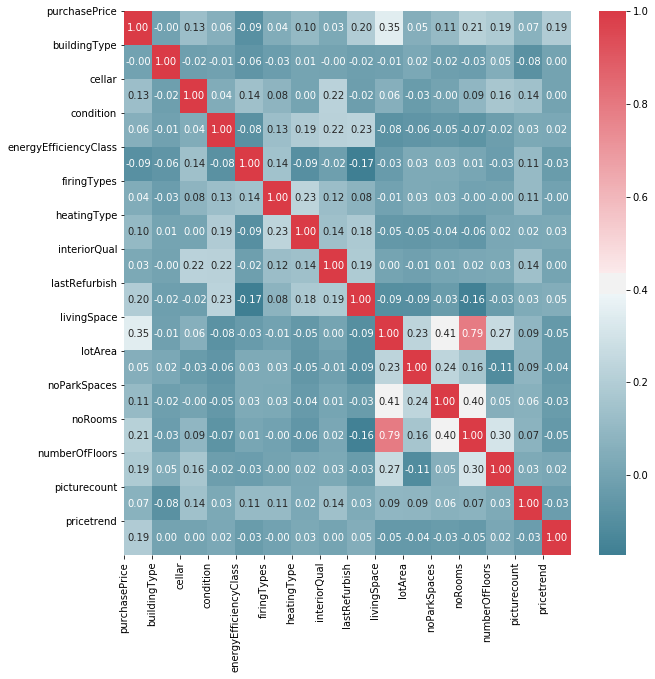

In [8]:
correlation_heatMap(df_used.iloc[:,1:18])

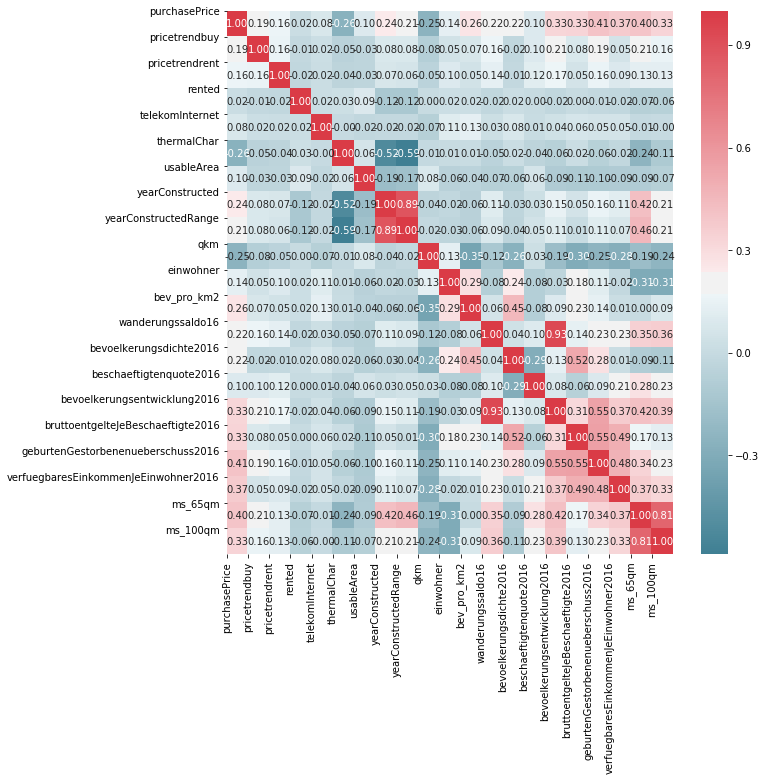

In [9]:
correlation_heatMap(df_used.iloc[:,[2]+list(range(18,df_used.shape[1]))])

Drop all features with a correlation lower than 0.1 to the purchasePrice:  
* buildingType
* condition
* energyEfficiencyClass
* firingTypes
* interiorQual
* picturecount
* lotArea
* rented
* telekomInternet

In [10]:
drop = ['buildingType', 'condition', 'energyEfficiencyClass', 'firingTypes', 'interiorQual', 
        'picturecount', 'lotArea', 'rented', 'telekomInternet']
continuous = ['zipCode', 'purchasePrice', 'cellar', 'heatingType', 'lastRefurbish', 'livingSpace', 'noParkSpaces',
              'noRooms', 'numberOfFloors', 'pricetrend', 'pricetrendbuy', 'pricetrendrent', 'thermalChar', 
              'usableArea', 'yearConstructed', 'yearConstructedRange', 'qkm', 'einwohner', 
              'bev_pro_km2', 'wanderungssaldo16', 'bevoelkerungsdichte2016', 'beschaeftigtenquote2016', 
              'bevoelkerungsentwicklung2016', 'bruttoentgelteJeBeschaeftigte2016', 
              'geburtenGestorbenenueberschuss2016', 'verfuegbaresEinkommenJeEinwohner2016', 'ms_65qm', 'ms_100qm']
df_used = df_used.drop(columns=drop)
print("shape df_used: "+str(df_used.shape))

shape df_used: (75666, 29)


In [11]:
df_used.columns

Index(['zipCode', 'bln', 'purchasePrice', 'cellar', 'heatingType',
       'lastRefurbish', 'livingSpace', 'noParkSpaces', 'noRooms',
       'numberOfFloors', 'pricetrend', 'pricetrendbuy', 'pricetrendrent',
       'thermalChar', 'usableArea', 'yearConstructed', 'yearConstructedRange',
       'qkm', 'einwohner', 'bev_pro_km2', 'wanderungssaldo16',
       'bevoelkerungsdichte2016', 'beschaeftigtenquote2016',
       'bevoelkerungsentwicklung2016', 'bruttoentgelteJeBeschaeftigte2016',
       'geburtenGestorbenenueberschuss2016',
       'verfuegbaresEinkommenJeEinwohner2016', 'ms_65qm', 'ms_100qm'],
      dtype='object')

For the moment drop all nans

In [12]:
df_used = df_used.dropna().reset_index(drop=True)
print("shape df_used: "+str(df_used.shape))

shape df_used: (4160, 29)


In [13]:
df_used.head()

,zipCode,bln,purchasePrice,cellar,heatingType,lastRefurbish,livingSpace,noParkSpaces,noRooms,numberOfFloors,pricetrend,pricetrendbuy,pricetrendrent,thermalChar,usableArea,yearConstructed,yearConstructedRange,qkm,einwohner,bev_pro_km2,wanderungssaldo16,bevoelkerungsdichte2016,beschaeftigtenquote2016,bevoelkerungsentwicklung2016,bruttoentgelteJeBeschaeftigte2016,geburtenGestorbenenueberschuss2016,verfuegbaresEinkommenJeEinwohner2016,ms_65qm,ms_100qm
0,32469,Nordrhein_Westfalen,135000.0,1.0,1.0,2017.0,98.0,3.0,5.0,2.0,8.32,8.32,4.44,54.0,49.0,1958.0,2.0,211.840241,26248.0,123.904693,-11.0,272.7,59.5,-37.9,42.8,-23.9,22262.0,4.505,4.505
1,22589,Hamburg,795000.0,1.0,3.0,2016.0,126.0,2.0,6.0,2.0,9.68,9.68,4.19,198.0,48.0,1961.0,2.0,8.430902,20028.0,2375.546531,120.4,299.8,59.4,91.3,47.0,-27.6,25006.0,6.090,10.590
2,55452,Rheinland_Pfalz,1190000.0,0.0,1.0,2007.0,213.0,5.0,5.0,2.0,9.13,9.13,3.45,115.0,60.0,2007.0,7.0,37.367504,7685.0,205.659977,71.7,180.1,57.7,36.3,44.3,-31.2,21680.0,8.860,10.290
3,21698,Niedersachsen,516000.0,0.0,2.0,2016.0,185.0,2.0,6.0,2.0,8.43,8.43,4.04,101.9,30.0,1998.0,5.0,103.384070,15016.0,145.244814,88.5,155.7,59.4,78.9,55.0,-7.7,21968.0,9.600,10.590
4,64673,Hessen,830000.0,1.0,1.0,2012.0,200.0,2.0,6.0,3.0,11.18,11.18,3.50,194.3,22.0,1975.0,3.0,5.655166,6595.0,1166.190347,68.3,365.0,58.1,37.7,46.7,-26.7,23330.0,7.320,7.120


# Remaining Data description

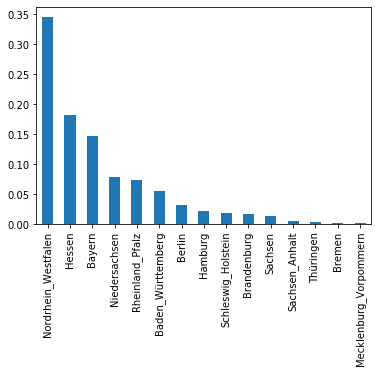

In [14]:
states = ['Nordrhein_Westfalen', 'Niedersachsen', 'Bayern', 
          'Baden_Württemberg', 'Rheinland_Pfalz', 'Hessen', 
          'Schleswig_Holstein', 'Sachsen', 'Brandenburg', 
          'Mecklenburg_Vorpommern', 'Sachsen_Anhalt', 'Saarland', 
          'Thüringen', 'Berlin', 'Hamburg', 'Bremen']
df_used.bln.value_counts(normalize=True).plot(kind="bar")

In [15]:
def univariant_analysis_continuous(df, column_name, boxplot = True):
    five_percent = df[column_name].quantile(q=0.05)
    print("5% Quantile: " + str(five_percent))
    
    first_quartile = df[column_name].quantile(q=0.25)
    print("25% Quantile: " + str(first_quartile))
    
    second_quartile = df[column_name].quantile(q=0.5)
    print("50% Quantile: " + str(second_quartile))
    
    third_quartile = df[column_name].quantile(q=0.75)
    print("75% Quantile: " + str(third_quartile))
    
    ninety_five_percent = df[column_name].quantile(q=0.95)
    print("95% Quantile: " + str(ninety_five_percent))
    
    std_dev = df[column_name].std(axis=0)
    print("Std_dev: " + str(std_dev))
    
    skew = df[column_name].skew(axis=0)
    print("Skewness: " + str(skew))
    
    kurtosis = df[column_name].kurtosis(axis=0)
    print("Kurtosis: " + str(kurtosis))
    
    mean = df[column_name].mean(axis=0)
    print("Mean: " + str(mean))

    median = df[column_name].median(axis=0)
    print("Median: " + str(median))

    max_val = df[column_name].max(axis=0, skipna=True)
    print("Max: " + str(max_val))

    min_val = df[column_name].min(axis=0, skipna=True)
    print("Min: " + str(min_val))
    
    relative_nan = (df[column_name].isna().sum())/len(df[column_name])
    print("Nan's (relative): {}%".format(relative_nan))
    
    print("Name: " + column_name + ', dtype: ' + str(df[column_name].dtypes))
    
    if boxplot:
        df_selected_by_quartile = df.loc[(df[column_name] > five_percent) & (df[column_name] < ninety_five_percent)]
        plt.boxplot(df_selected_by_quartile[column_name])
        plt.show()

5% Quantile: 14167.0
25% Quantile: 41516.0
50% Quantile: 53227.0
75% Quantile: 65232.0
95% Quantile: 84568.09999999999
Std_dev: 20728.64157525586
Skewness: -0.27986656996364084
Kurtosis: -0.4129201906869704
Mean: 53028.515384615384
Median: 53227.0
Max: 99098
Min: 1139
Nan's (relative): 0.0%
Name: zipCode, dtype: int64


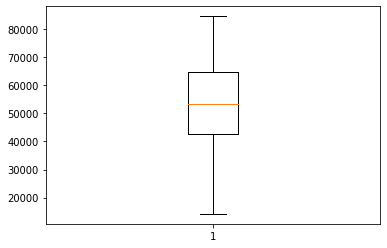

###############################

5% Quantile: 198000.0
25% Quantile: 349000.0
50% Quantile: 490000.0
75% Quantile: 695000.0
95% Quantile: 1095000.0
Std_dev: 265483.9946806132
Skewness: 0.7981112057611851
Kurtosis: 0.10529063721566922
Mean: 545633.5008774038
Median: 490000.0
Max: 1299000.0
Min: 73000.0
Nan's (relative): 0.0%
Name: purchasePrice, dtype: float64


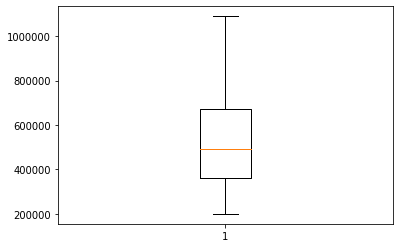

###############################

5% Quantile: 0.0
25% Quantile: 0.0
50% Quantile: 1.0
75% Quantile: 1.0
95% Quantile: 1.0
Std_dev: 0.45070955489357234
Skewness: -0.9615536850195444
Kurtosis: -1.0759320170880002
Mean: 0.7165865384615384
Median: 1.0
Max: 1.0
Min: 0.0
Nan's (relative): 0.0%
Name: cellar, dtype: float64


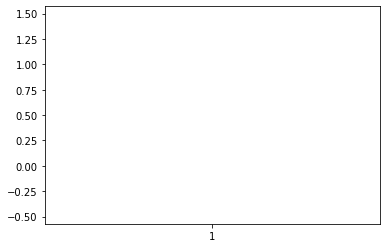

###############################

5% Quantile: 0.0
25% Quantile: 1.0
50% Quantile: 1.0
75% Quantile: 3.0
95% Quantile: 7.0
Std_dev: 2.1827153170382347
Skewness: 1.3676274971512141
Kurtosis: 0.35064065412711276
Mean: 2.2502403846153847
Median: 1.0
Max: 7.0
Min: 0.0
Nan's (relative): 0.0%
Name: heatingType, dtype: float64


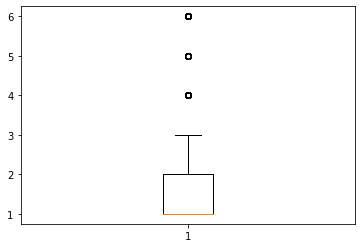

###############################

5% Quantile: 1936.0
25% Quantile: 1978.0
50% Quantile: 2003.0
75% Quantile: 2015.0
95% Quantile: 2019.0
Std_dev: 27.252051170633468
Skewness: -1.4158375227281095
Kurtosis: 1.7822163191516904
Mean: 1993.451923076923
Median: 2003.0
Max: 2020.0
Min: 1886.0
Nan's (relative): 0.0%
Name: lastRefurbish, dtype: float64


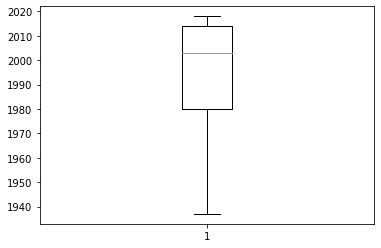

###############################

5% Quantile: 101.0
25% Quantile: 133.0
50% Quantile: 166.0
75% Quantile: 220.0
95% Quantile: 340.0
Std_dev: 78.86890864019357
Skewness: 1.685161727729787
Kurtosis: 4.097570742211509
Mean: 187.15253125
Median: 166.0
Max: 707.6
Min: 55.59
Nan's (relative): 0.0%
Name: livingSpace, dtype: float64


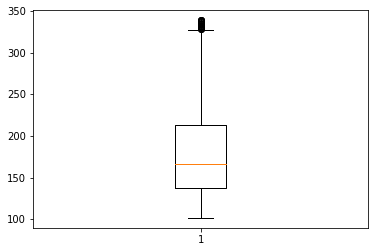

###############################

5% Quantile: 1.0
25% Quantile: 1.0
50% Quantile: 2.0
75% Quantile: 2.0
95% Quantile: 5.0
Std_dev: 1.551706812941484
Skewness: 2.513213681164745
Kurtosis: 8.561965549811765
Mean: 2.0903846153846155
Median: 2.0
Max: 13.0
Min: 0.0
Nan's (relative): 0.0%
Name: noParkSpaces, dtype: float64


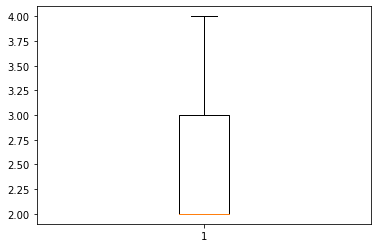

###############################

5% Quantile: 4.0
25% Quantile: 5.0
50% Quantile: 6.0
75% Quantile: 8.0
95% Quantile: 11.0
Std_dev: 2.6373778518992603
Skewness: 1.8926982456728068
Kurtosis: 5.737041710242986
Mean: 6.4582932692307695
Median: 6.0
Max: 26.0
Min: 2.0
Nan's (relative): 0.0%
Name: noRooms, dtype: float64


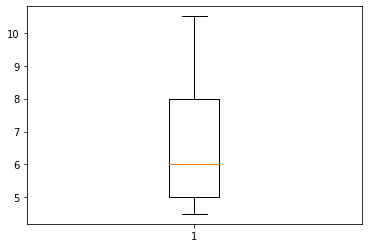

###############################

5% Quantile: 1.0
25% Quantile: 2.0
50% Quantile: 2.0
75% Quantile: 3.0
95% Quantile: 4.0
Std_dev: 0.7690202608366715
Skewness: 0.2264075653733547
Kurtosis: -0.1859884202479294
Mean: 2.3
Median: 2.0
Max: 4.0
Min: 0.0
Nan's (relative): 0.0%
Name: numberOfFloors, dtype: float64


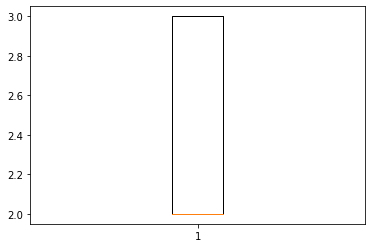

###############################

5% Quantile: 3.8895000000000004
25% Quantile: 6.4775
50% Quantile: 8.13
75% Quantile: 9.84
95% Quantile: 12.9
Std_dev: 2.938827557862322
Skewness: 0.14578958585746454
Kurtosis: 2.292634713111918
Mean: 8.178697115384617
Median: 8.13
Max: 22.27
Min: -4.56
Nan's (relative): 0.0%
Name: pricetrend, dtype: float64


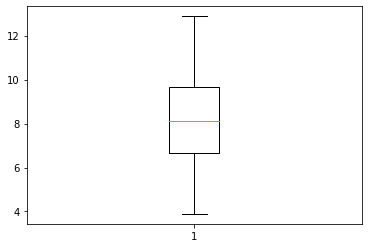

###############################

5% Quantile: 3.8895000000000004
25% Quantile: 6.4775
50% Quantile: 8.13
75% Quantile: 9.84
95% Quantile: 12.9
Std_dev: 2.938827557862322
Skewness: 0.14578958585746454
Kurtosis: 2.292634713111918
Mean: 8.178697115384617
Median: 8.13
Max: 22.27
Min: -4.56
Nan's (relative): 0.0%
Name: pricetrendbuy, dtype: float64


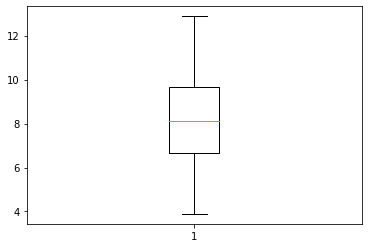

###############################

5% Quantile: -0.9804999999999998
25% Quantile: 2.28
50% Quantile: 3.74
75% Quantile: 5.0225
95% Quantile: 7.19
Std_dev: 2.5585935606067824
Skewness: -0.6840962211700018
Kurtosis: 5.829313208021965
Mean: 3.5280384615384612
Median: 3.74
Max: 19.31
Min: -22.1
Nan's (relative): 0.0%
Name: pricetrendrent, dtype: float64


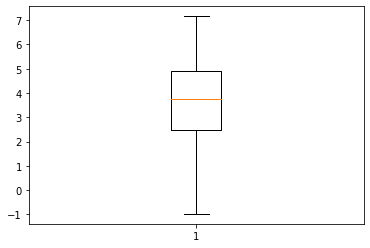

###############################

5% Quantile: 28.0
25% Quantile: 88.94
50% Quantile: 134.45499999999998
75% Quantile: 189.855
95% Quantile: 296.905
Std_dev: 88.56411599249508
Skewness: 2.803940198141375
Kurtosis: 31.627571722107618
Mean: 146.9977764423077
Median: 134.45499999999998
Max: 1700.0
Min: 1.0
Nan's (relative): 0.0%
Name: thermalChar, dtype: float64


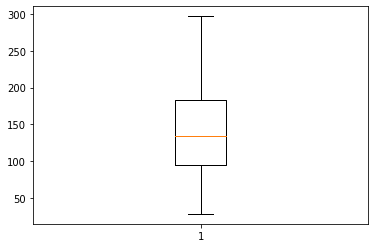

###############################

5% Quantile: 16.0
25% Quantile: 45.0
50% Quantile: 70.0
75% Quantile: 117.0
95% Quantile: 260.0499999999997
Std_dev: 87.45462113765603
Skewness: 2.9585321300617937
Kurtosis: 13.555976188157446
Mean: 95.02484374999999
Median: 70.0
Max: 880.0
Min: 0.0
Nan's (relative): 0.0%
Name: usableArea, dtype: float64


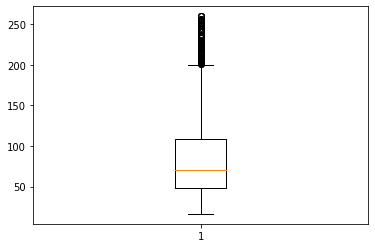

###############################

5% Quantile: 1911.0
25% Quantile: 1961.0
50% Quantile: 1978.0
75% Quantile: 1998.0
95% Quantile: 2018.0
Std_dev: 29.29960867325478
Skewness: -0.7346556012482368
Kurtosis: 0.2666166434295749
Mean: 1975.08125
Median: 1978.0
Max: 2020.0
Min: 1886.0
Nan's (relative): 0.0%
Name: yearConstructed, dtype: float64


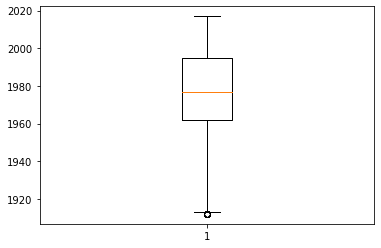

###############################

5% Quantile: 1.0
25% Quantile: 2.0
50% Quantile: 3.0
75% Quantile: 5.0
95% Quantile: 9.0
Std_dev: 2.336365076259207
Skewness: 0.8219075190022809
Kurtosis: -0.27699862602694925
Mean: 3.7564903846153848
Median: 3.0
Max: 9.0
Min: 1.0
Nan's (relative): 0.0%
Name: yearConstructedRange, dtype: float64


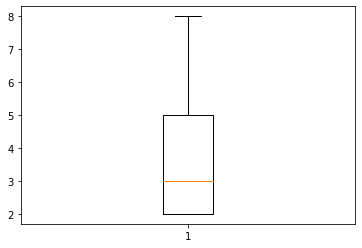

###############################

5% Quantile: 5.066955
25% Quantile: 13.444311
50% Quantile: 28.6857845
75% Quantile: 54.234523
95% Quantile: 114.63533009999978
Std_dev: 41.7467389734401
Skewness: 3.5265425166407627
Kurtosis: 21.53144459419633
Mean: 40.19244545673078
Median: 28.6857845
Max: 429.901607
Min: 1.639199
Nan's (relative): 0.0%
Name: qkm, dtype: float64


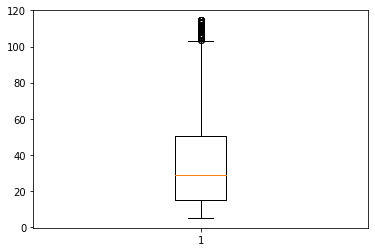

###############################

5% Quantile: 3968.2000000000003
25% Quantile: 12888.0
50% Quantile: 19229.5
75% Quantile: 25576.5
95% Quantile: 43570.499999999985
Std_dev: 11155.803938074641
Skewness: 0.8421067904829305
Kurtosis: 0.8627945708260345
Mean: 20128.595192307694
Median: 19229.5
Max: 58826.0
Min: 888.0
Nan's (relative): 0.0%
Name: einwohner, dtype: float64


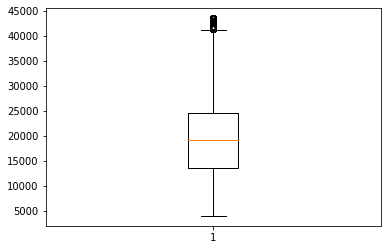

###############################

5% Quantile: 106.6371414975102
25% Quantile: 255.70095772609642
50% Quantile: 656.5685297451791
75% Quantile: 1432.4232227574757
95% Quantile: 3676.258563724362
Std_dev: 1266.907680650662
Skewness: 2.6176464255814165
Kurtosis: 10.90198902342548
Mean: 1102.5165712680443
Median: 656.5685297451791
Max: 11578.310130912025
Min: 19.06334287439643
Nan's (relative): 0.0%
Name: bev_pro_km2, dtype: float64


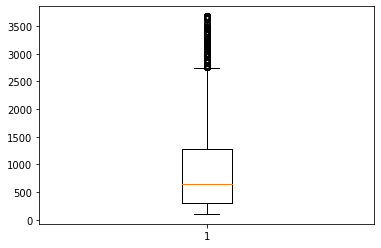

###############################

5% Quantile: -18.3
25% Quantile: 28.0
50% Quantile: 60.75
75% Quantile: 94.1
95% Quantile: 129.3
Std_dev: 50.54379427949688
Skewness: -0.28045492105740255
Kurtosis: 0.5931677493164571
Mean: 58.92901442307693
Median: 60.75
Max: 226.9
Min: -243.1
Nan's (relative): 0.0%
Name: wanderungssaldo16, dtype: float64


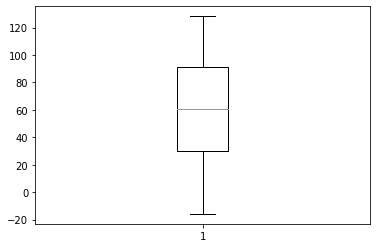

###############################

5% Quantile: 88.1
25% Quantile: 197.6
50% Quantile: 365.4
75% Quantile: 768.9
95% Quantile: 2067.8
Std_dev: 650.5577270326698
Skewness: 2.5863201574583816
Kurtosis: 8.255423346143528
Mean: 592.9097596153846
Median: 365.4
Max: 4355.3
Min: 42.4
Nan's (relative): 0.0%
Name: bevoelkerungsdichte2016, dtype: float64


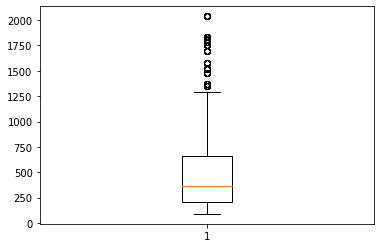

###############################

5% Quantile: 51.4
25% Quantile: 56.0
50% Quantile: 58.0
75% Quantile: 59.8
95% Quantile: 63.2
Std_dev: 3.515179412450841
Skewness: -0.38818272025726763
Kurtosis: 0.1238297703642921
Mean: 57.75283653846154
Median: 58.0
Max: 66.2
Min: 43.7
Nan's (relative): 0.0%
Name: beschaeftigtenquote2016, dtype: float64


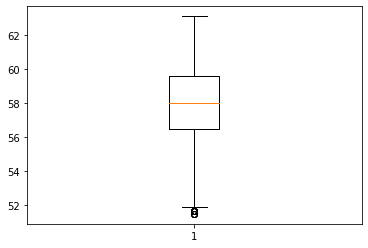

###############################

5% Quantile: -55.4
25% Quantile: -6.3
50% Quantile: 48.9
75% Quantile: 82.6
95% Quantile: 122.1
Std_dev: 58.07379712921747
Skewness: -0.271786078004133
Kurtosis: 0.6867587227251506
Mean: 40.87324519230769
Median: 48.9
Max: 239.4
Min: -323.3
Nan's (relative): 0.0%
Name: bevoelkerungsentwicklung2016, dtype: float64


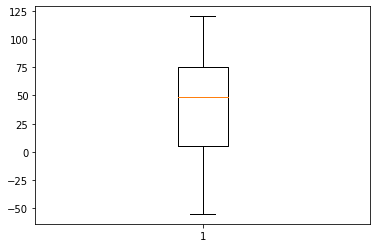

###############################

5% Quantile: 33.1
25% Quantile: 42.1
50% Quantile: 46.8
75% Quantile: 52.1
95% Quantile: 61.4
Std_dev: 8.237701017453121
Skewness: 0.7473781443949117
Kurtosis: 1.8652906263363298
Mean: 47.10079326923076
Median: 46.8
Max: 84.4
Min: 27.0
Nan's (relative): 0.0%
Name: bruttoentgelteJeBeschaeftigte2016, dtype: float64


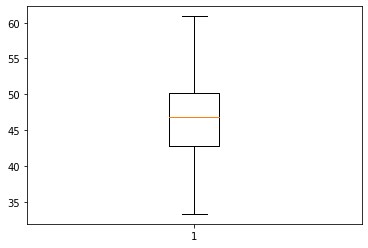

###############################

5% Quantile: -40.5
25% Quantile: -27.6
50% Quantile: -15.4
75% Quantile: -4.6
95% Quantile: 18.8
Std_dev: 19.15041648744887
Skewness: 0.42812504485474645
Kurtosis: 0.7168917494068987
Mean: -14.297331730769232
Median: -15.4
Max: 48.6
Min: -81.4
Nan's (relative): 0.0%
Name: geburtenGestorbenenueberschuss2016, dtype: float64


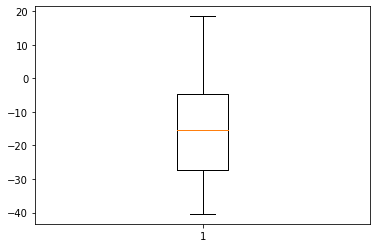

###############################

5% Quantile: 19448.0
25% Quantile: 20977.0
50% Quantile: 22672.0
75% Quantile: 23954.0
95% Quantile: 26641.0
Std_dev: 2733.968781634694
Skewness: 1.4967260603533241
Kurtosis: 4.329776445053405
Mean: 22727.10360576923
Median: 22672.0
Max: 34987.0
Min: 16203.0
Nan's (relative): 0.0%
Name: verfuegbaresEinkommenJeEinwohner2016, dtype: float64


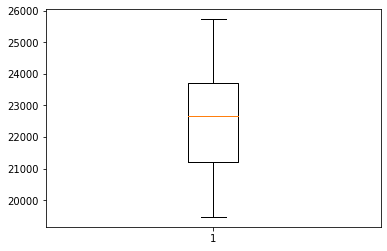

###############################

5% Quantile: 4.6
25% Quantile: 5.79
50% Quantile: 7.25
75% Quantile: 8.03
95% Quantile: 10.14
Std_dev: 1.677166648340755
Skewness: 0.26366245699430935
Kurtosis: -0.6271117757512861
Mean: 7.097688701923078
Median: 7.25
Max: 12.76
Min: 2.875
Nan's (relative): 0.0%
Name: ms_65qm, dtype: float64


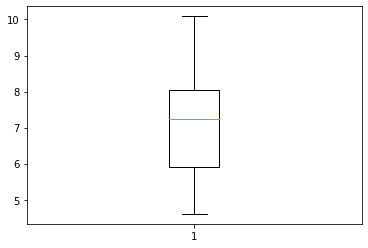

###############################

5% Quantile: 5.37
25% Quantile: 6.327500000000001
50% Quantile: 7.12
75% Quantile: 8.66
95% Quantile: 10.59
Std_dev: 1.5566663903498166
Skewness: 0.37340820686504095
Kurtosis: -0.6967050575972995
Mean: 7.538635817307693
Median: 7.12
Max: 12.06
Min: 3.4
Nan's (relative): 0.0%
Name: ms_100qm, dtype: float64


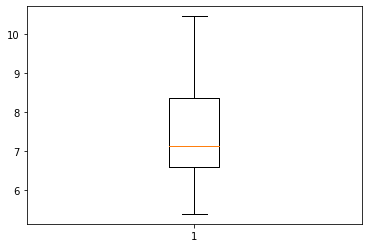

###############################



In [16]:
for column_name in continuous:
    univariant_analysis_continuous(df_used, column_name)
    print('###############################\n')

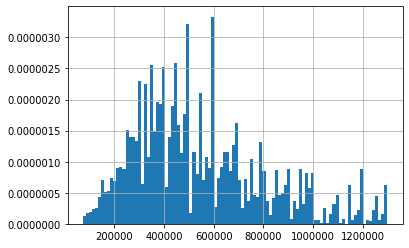

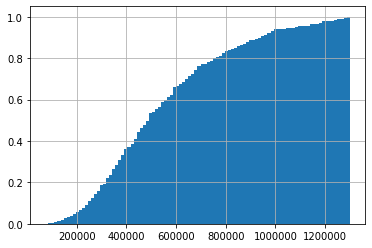

In [17]:
df_used.purchasePrice.hist(density=1, bins=100)
plt.show()
df_used.purchasePrice.hist(cumulative=True, density=1, bins=100)
plt.show()

# Z-Transformation and Train-Test-Splitting

In [18]:
def scale_df(df, columns_to_scale=[]):
    if not columns_to_scale:
        raise Exception("Which columns should be scaled?")
    
    scaler = StandardScaler()
    scaler = scaler.fit(df[columns_to_scale])
    df[columns_to_scale] = scaler.transform(df[columns_to_scale])
    
    # original = scaler.inverse_transform(df)
    return df, scaler 

In [19]:
input_columns2scale = ['lastRefurbish', 'livingSpace', 'noParkSpaces', 'noRooms', 'numberOfFloors', 'pricetrend', 
                       'pricetrendbuy', 'pricetrendrent', 'thermalChar', 'usableArea', 'yearConstructed', 
                       'yearConstructedRange', 'qkm', 'einwohner', 'bev_pro_km2', 'wanderungssaldo16', 
                       'bevoelkerungsdichte2016', 'beschaeftigtenquote2016', 'bevoelkerungsentwicklung2016', 
                       'bruttoentgelteJeBeschaeftigte2016', 'geburtenGestorbenenueberschuss2016', 
                       'verfuegbaresEinkommenJeEinwohner2016', 'ms_65qm', 'ms_100qm']
target_columns2scale = ['purchasePrice']

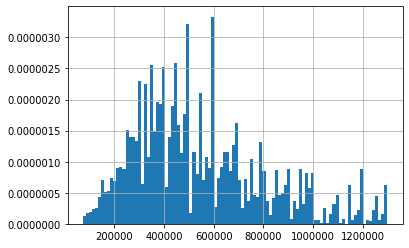

In [49]:
# df = df_used.loc[(df_used['purchasePrice'] >= 349000.0) & (df_used['purchasePrice'] <= 695000.0)]
df = df_used
df.purchasePrice.hist(density=1, bins=100)
plt.show()
df_input_scaled, scaler_input = scale_df(df.iloc[:,3:df.shape[1]], input_columns2scale)
df_output_scaled, scaler_output = scale_df(pd.DataFrame(df.iloc[:,2]), target_columns2scale)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df_input_scaled, df_output_scaled, 
                                                    test_size=0.33, random_state=42)
print("shape X_train: "+str(X_train.shape))
print("shape Y_train: "+str(y_train.shape))
print("\nshape X_test: "+str(X_test.shape))
print("shape Y_test: "+str(y_test.shape))

shape X_train: (2787, 26)
shape Y_train: (2787, 1)

shape X_test: (1373, 26)
shape Y_test: (1373, 1)


# Testing different machine learning models

**Evaluation function**

In [51]:
def pred_mean_percentage_deviation(pred_unscaled, y, input_scaler, target_scaler):    
    # dim 0: real price; dim 1: prediction price
    real_vs_prediction = np.ndarray(shape=(pred_unscaled.shape[0],2))

    # prediction
    real_vs_prediction[:,1] = target_scaler.inverse_transform(pred_unscaled)[:,0]
    # real price
    real_vs_prediction[:,0] = target_scaler.inverse_transform(y)[:,0]
    
    # Calculate mean percentage deviation
    deviations = []
    max_dev_pos = 0
    max_dev_neg = 0
    for i in range(real_vs_prediction.shape[0]-1):
        real = real_vs_prediction[i,0]
        prediction = real_vs_prediction[i,1]
        dev = real-prediction
        if dev > 0:
            if dev > max_dev_pos:
                max_dev_pos = dev
        else:
            if dev < max_dev_neg:
                max_dev_neg = dev
        dev_percent = dev/real
        deviations.append(dev_percent)
        
    mpd = np.mean(deviations)
    print("Mean percentage deviation: %.8f%%" % (mpd*100))
    print("Maximum deviation (pos): %.2f" % (max_dev_pos))
    print("Maximum deviation (neg): %.2f" % (max_dev_neg))
    
    deviations_np = np.asarray(deviations)*100
    q1 = np.percentile(deviations_np, 25)
    median = np.percentile(deviations_np, 50)
    q2 = np.percentile(deviations_np, 75)
    print("\nThird Quartile: %.8f%%" % (q2))
    print("Median: %.8f%%" % (median))
    print("First Quartile: %.8f%%" % (q1))
    
    plt.boxplot(deviations_np)
    plt.show()
    
    return real_vs_prediction, deviations

## Lineare Regression

In [52]:
linear_reg_model = LinearRegression().fit(X_train, y_train)

Mean percentage deviation: -10.61442291%
Maximum deviation (pos): 705483.80
Maximum deviation (neg): -653391.10

Third Quartile: 15.46571258%
Median: -4.29530312%
First Quartile: -29.50250528%


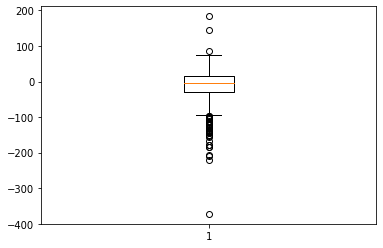

In [53]:
linear_reg_pred = linear_reg_model.predict(X_test)
real_vs_pred, deviations = pred_mean_percentage_deviation(linear_reg_pred, 
                                                                       y_test,
                                                                       scaler_input, 
                                                                       scaler_output)

## Random Forest

In [54]:
rf_reg_model = RandomForestRegressor(max_depth=20, 
                                     random_state=0, 
                                     n_estimators=200,
                                     max_features="sqrt",
                                     verbose = 1)

In [55]:
rf_reg_model.fit(X_train, y_train)  

/Users/matthies/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.2s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=0, verbose=1,
                      warm_start=False)

Mean percentage deviation: -11.53113116%
Maximum deviation (pos): 648590.35
Maximum deviation (neg): -532112.50

Third Quartile: 10.14439691%
Median: -4.63499033%
First Quartile: -25.15777884%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


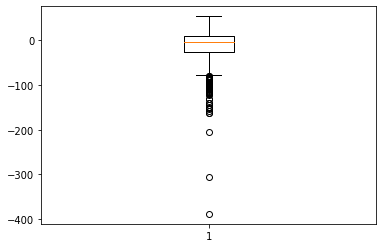

In [56]:
rf_reg_pred = rf_reg_model.predict(X_test)
rf_reg_pred = rf_reg_pred.reshape(rf_reg_pred.shape[0],1)
real_vs_pred, deviations = pred_mean_percentage_deviation(rf_reg_pred, 
                                                           y_test,
                                                           scaler_input, 
                                                           scaler_output)

In [57]:
rf_reg_model.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


0.6898620993471545

In [58]:
# extract single Tree
#tree = rf_reg_model.estimators_[5]
#export_graphviz(tree, 
#                out_file='tree.dot',
#                feature_names = df_used.iloc[:,3:df_used.shape[1]].columns,
#                rounded = True, 
#                proportion = False, 
#                precision = 2, 
#                filled = True)

## Support Vector Regression

In [59]:
clf = SVR(kernel='linear')
clf.fit(X_train, y_train) 

/Users/matthies/anaconda3/envs/ai/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

Mean percentage deviation: -5.71495609%
Maximum deviation (pos): 737947.97
Maximum deviation (neg): -652246.38

Third Quartile: 18.90423421%
Median: 0.29012071%
First Quartile: -22.95804848%


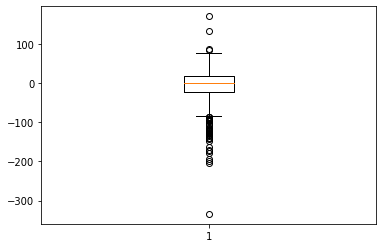

In [60]:
svm_pred = clf.predict(X_test)
svm_pred = svm_pred.reshape(svm_pred.shape[0],1)
real_vs_pred, deviations = pred_mean_percentage_deviation(svm_pred, 
                                                           y_test,
                                                           scaler_input, 
                                                           scaler_output)

## Deep Learning

In [61]:
set_random_seed(2)
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(256, 
                   input_dim = X_train.shape[1], 
                   activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(512, 
                   activation='relu'))
# NN_model.add(Dropout(0.5))
NN_model.add(Dense(512, 
                   activation='relu'))
# NN_model.add(Dropout(0.5))
NN_model.add(Dense(256, 
                   activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, 
                   activation='linear'))

# Compile the network :
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True, clipvalue=0.5)
adam = optimizers.Adam(lr=0.001)
NN_model.compile(loss='mean_absolute_error', optimizer=adam, metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               6912      
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 532,737
Trainable params: 532,737
Non-trainable params: 0
_________________________________________________________________


In [62]:
NN_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split = 0.2)

Train on 2229 samples, validate on 558 samples
Epoch 1/30
2229/2229 [==============================] - 3s 1ms/step - loss: 0.5724 - mean_absolute_error: 0.5724 - val_loss: 0.5340 - val_mean_absolute_error: 0.5340
Epoch 2/30
2229/2229 [==============================] - 1s 631us/step - loss: 0.4799 - mean_absolute_error: 0.4799 - val_loss: 0.4920 - val_mean_absolute_error: 0.4920
Epoch 3/30
2229/2229 [==============================] - 1s 652us/step - loss: 0.4574 - mean_absolute_error: 0.4574 - val_loss: 0.5054 - val_mean_absolute_error: 0.5054
Epoch 4/30
2229/2229 [==============================] - 1s 630us/step - loss: 0.4242 - mean_absolute_error: 0.4242 - val_loss: 0.5160 - val_mean_absolute_error: 0.5160
Epoch 5/30
2229/2229 [==============================] - 1s 630us/step - loss: 0.4089 - mean_absolute_error: 0.4089 - val_loss: 0.4657 - val_mean_absolute_error: 0.4657
Epoch 6/30
2229/2229 [==============================] - 1s 627us/step - loss: 0.3887 - mean_absolute_error: 0.3887 

Mean percentage deviation: -10.91029386%
Maximum deviation (pos): 735267.84
Maximum deviation (neg): -964958.50

Third Quartile: 10.71020913%
Median: -5.25446262%
First Quartile: -25.56719618%


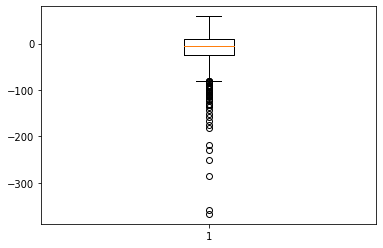

In [64]:
dl_pred = NN_model.predict(X_test)
real_vs_pred, deviations = pred_mean_percentage_deviation(dl_pred, 
                                                           y_test,
                                                           scaler_input, 
                                                           scaler_output)